In [1]:
import sys
from vispy import color
from vispy import scene
from vispy import app, plot
import pylab
import recviewer
from astropy.io import fits
from astropy.utils.data import download_file
import numpy as np

Populating the interactive namespace from numpy and matplotlib


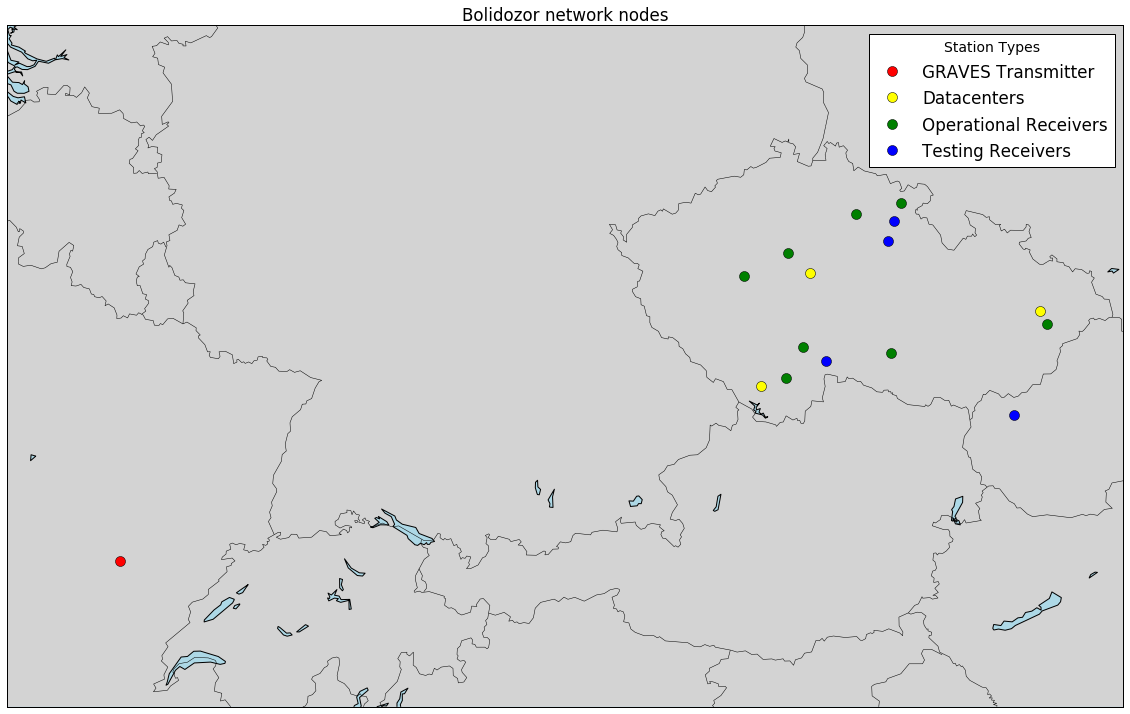

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%pylab inline

stations = []
stations.append({'name': 'Zebrak','latitude':49.8736, 'longitude':13.8986, 'status': 'operational', 'type': 'receiver'})
stations.append({'name': 'uFlu','latitude':50.0795, 'longitude':14.4891, 'status': 'operational', 'type': 'receiver'})
stations.append({'name': 'OBSUPICE','latitude':50.5067,'longitude':16.0115, 'status': 'operational', 'type': 'receiver'})
stations.append({'name': 'SVAKOV','latitude':49.2607,'longitude':14.6917, 'status': 'operational', 'type': 'receiver'})
stations.append({'name': 'ZVPP','latitude':48.9869,'longitude':14.4675, 'status': 'operational', 'type': 'receiver'})
stations.append({'name': 'BPB','latitude':48.653153,'longitude':17.537413, 'status': 'testing', 'type': 'receiver'})
stations.append({'name': 'HPHK','latitude':50.1772,'longitude':15.8386, 'status': 'testing', 'type': 'receiver'})
stations.append({'name': 'OBSJAROMER','latitude':50.351397,'longitude':15.915878, 'status': 'testing', 'type': 'receiver'})
stations.append({'name': 'JHRADEC','latitude':49.1314,'longitude': 14.9999, 'status': 'testing', 'type': 'receiver'})
stations.append({'name': 'VALMEZ','latitude':49.463038,'longitude': 17.973544, 'status': 'operational', 'type': 'receiver'})
stations.append({'name': 'NACHODSKO','latitude':50.409407,'longitude':15.414812, 'status': 'operational', 'type': 'receiver'})
stations.append({'name': 'Forpsi','latitude':48.9169761,'longitude':14.1326528, 'status': 'operational', 'type': 'datacenter'})
stations.append({'name': 'Ondrejov','latitude':49.9046144,'longitude':14.7842044, 'status': 'operational', 'type': 'datacenter'})
stations.append({'name': 'Dub','latitude':49.5717811,'longitude':17.8831233, 'status': 'operational', 'type': 'datacenter'})
stations.append({'name': 'DDMTREBIC','latitude':49.207180,'longitude':15.876004, 'status': 'operational', 'type': 'receiver'})

land_color = 'lightgray'
water_color = 'lightblue'
matplotlib.rcParams.update({'font.size': 14})   # font size settings.


fig, ax = subplots(figsize=(20,20))
#fig = pylab.figure(figsize=(20,20))
# central EU region
map = Basemap(projection='merc', llcrnrlat=46, urcrnrlat=52, llcrnrlon=4, urcrnrlon=19, resolution='i',area_thresh = 20)
# Czech Republic region
#map = Basemap(projection='merc', llcrnrlat=48, urcrnrlat=51.5, llcrnrlon=12, urcrnrlon=19, resolution='i',area_thresh = 20)

land_color = 'lightgray'
water_color = 'lightblue'

map.fillcontinents(color=land_color, lake_color=water_color)
map.drawcoastlines()
map.drawcountries()
#map.drawparallels(np.arange(-90.,120.,30.))
#map.drawmeridians(np.arange(0.,420.,60.))
map.drawmapboundary(fill_color=water_color)
#ax.set_title('Bistatic network')
#x, y = map(np.array(near_transmitters.longitude_deg), np.array(near_transmitters.latitude_deg))
#map.plot(x, y, marker='o', markersize=6, markerfacecolor='red', linewidth=0)

x, y = map(np.array(5.5151), np.array(47.348))
transmitters, = map.plot(x, y, marker='o', markersize=10, markerfacecolor='red', linewidth=0,label='GRAVES Transmitter')

for station in stations:
    station_latitude = station['latitude']
    station_longitude = station['longitude']
    x, y = map(station_longitude, station_latitude)
    if station['status'] is 'operational' and station['type'] is 'datacenter':
        datacenter, = map.plot(x, y, marker='o', markersize=10, markerfacecolor='yellow', linewidth=0,label='Datacenters')
    if station['status'] is 'operational' and station['type'] is 'receiver':
        receivers, = map.plot(x, y, marker='o', markersize=10, markerfacecolor='green', linewidth=0,label='Operational Receivers')
    if station['status'] is 'testing' and station['type'] is 'receiver':
        testing, = map.plot(x, y, marker='o', markersize=10, markerfacecolor='blue', linewidth=0, label='Testing Receivers')

        
plt.title('Bolidozor network nodes')
plt.legend(handles=[transmitters, datacenter, receivers, testing],numpoints=1, title="Station Types")
#plt.legend(handles=[ datacenter, receivers, testing],numpoints=1, title="Station Types")
map.ax = ax
fig.show()
#%pylab qt

In [6]:
print(testing)

Line2D(Testing Receivers)
